---
title: 13.2 Gradient Descent
subject:  Optimization
subtitle: 
short_title: 13.2 Gradient Descent
authors:
  - name: Nikolai Matni
    affiliations:
      - Dept. of Electrical and Systems Engineering
      - University of Pennsylvania
    email: nmatni@seas.upenn.edu
license: CC-BY-4.0
keywords: 
math:
  '\vv': '\mathbf{#1}'
  '\bm': '\begin{bmatrix}'
  '\em': '\end{bmatrix}'
  '\R': '\mathbb{R}'
---

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/nikolaimatni/ese-2030/HEAD?labpath=/12_Ch_13_Optimization/142-Gradient_Descent.ipynb)

{doc}`Lecture notes <../lecture_notes/Lecture 21 - An introduction to unconstrained optimization, gradient descent, and Newton’s method.pdf>`

## Reading

Material related to this page, as well as additional exercises, can be found in Chapter 12 in ROB101 textbook by Jesse Grizzle 

## Learning Objectives

By the end of this page, you should know:
- what is the gradient descent algorithm
- examples of implementing the gradient descent algorithm
- what is exact line search
- when does gradient descent perform poorly and how to address it

## Introduction

Our intuition so far is that we should try to "walk downhill" and that the negative gradient $-\nabla f(\vv x)$ tells us the steepest direction of descent at point $\vv x$. Can we turn this into an algorithm for minimizing (at least locally) a cost function $f(\vv x)$?

This intuition is precisely the motivation behind the _gradient descent algorithm_, which starting with an initial guess $\vv x^{(0)}$, iteratively updates the current best guess $\vv x^{(k)}$ of $\vv x^*$ according to:

\begin{equation}
\label{GD}
\vv x^{(k+1)} = \vv x^{(k)} - s\nabla f(\vv x^{(k)}), \quad \text{for } k=0,1,2,\ldots \quad (\text{GD})
\end{equation}

where $s>0$ is called the _step size_. The update rule [(GD)](#GD) moves you in the direction of a local minimum if $s>0$, but be careful, because if $s$ is too large, you can overshoot (we'll see more about this later).

Because we know that $\nabla f(\vv x^*)=0$ if $\vv x^*$ is a local minima, we can use the norm of the gradient as a stopping criterion, i.e., if $\|\nabla f(\vv x^{(k)})\| \leq \epsilon$ for some small $\epsilon>0$, we stop updating our iterate because $\vv x^{(k)}$ is "close enough" to $\vv x^*$ (typical choice of $\epsilon$ are $10^{-4}$ or $10^{-6}$, depending on how precise of a solution is required).

Before looking at some examples of [(GD)](#GD) in action, let's try to get some intuition as to why it might work. Suppose we are currently at $\vv x^{(k)}$: let's form a _linear approximation_ of $f(\vv x)$ near $\vv x^{(k)}$ using its _first-order Taylor series approximation_:

\begin{equation}
\label{TS}
f(\vv x) \approx \underbrace{f(\vv x^{(k)})}_{\text{base point}} + \underbrace{\nabla f(\vv x^{(k)})^T}_{\text{how } f \text{ changes at } x^{(k)}}\underbrace{(\vv x-\vv x^{(k)})}_{\text{direction of change}} \quad (\text{TS})
\end{equation}

:::{figure}../figures/14-GD.jpg
:label:GD_fig
:alt:GD
:width: 500px
:align: center
:::

As you can see from the [figure](#GD_fig), [(TS)](#TS) is a very good approximation of $f(\vv x)$ when $\vv x$ is not too far from $\vv x^{(k)}$, but gets worse as we move further away.

Let's use [(TS)](#TS) to define our next point $\vv x^{(k+1)}$ so that $f(\vv x^{(k+1)}) < f(\vv x^{(k)})$. If we define $\Delta \vv x^{(k)} = \vv x^{(k+1)} - \vv x^{(k)}$, then evaluating [(TS)](#TS) at point $\vv x^{(k+1)}$ becomes

$$
f(\vv x^{(k+1)}) - f(\vv x^{(k)}) \approx \nabla f(\vv x^{(k)})^T \Delta \vv x^{(k)} \left(= \langle \nabla f(\vv x^{(k)}), \Delta \vv x^{(k)} \rangle\right)
$$

so that if we want $f(\vv x^{(k+1)}) < f(\vv x^{(k)})$, then we should find a nearby $\vv x^{(k+1)}$ such that

\begin{equation}
\label{good_neighb}
\nabla f(\vv x^{(k)})^T \Delta \vv x^{(k)} < 0.
\end{equation}

Now, assuming that $\nabla f(\vv x^{(k)}) \neq \vv 0$ (so we're not at a local extremum), a clear choice for $\Delta \vv x^{(k)}$ is $-s\nabla f(\vv x^{(k)})$ for $s>0$ a step size chosen small enough so that [(TS)](#TS) is a good approximation. In that case, we have

$$
\nabla f(\vv x^{(k)})^T \Delta \vv x^{(k)} = -s\|\nabla f(\vv x^{(k)})\|^2 < 0.
$$

In general though, any choice $\Delta \vv x^{(k)}$ such that [](#good_neighb) holds is a valid descent direction. Geometrically, this is illustrated in the picture below:


:::{figure}../figures/14-GD_dir.jpg
:label:GD_dir
:alt:GD direction
:width: 400px
:align: center
:::

:::{prf:example} Minimizing a quadratic function with gradient descent
:label: eg1
Let's use gradient descent to minimize $f(\vv x) = \frac{1}{2}\|\vv x\|^2$. This is a silly example, but one we can easily compute iterates by hand for. Here $\nabla f(\vv x) = \vv x$, so our descent direction is $-\nabla f(\vv x) = -\vv x$. Let's use $\vv x\in\mathbb{R}^2$ and an initial guess of $\vv x^{(0)} = (1,1)$. We'll use a step size of $s = \frac{1}{2}$. Then

$$
\vv x^{(1)} = \bm 1 \\ 1\em, \vv x^{(1)} = \vv x^{(0)} - \frac{1}{2}\nabla f(\vv x^{(0)}) = \begin{bmatrix} 1 \\ 1 \end{bmatrix} - \frac{1}{2}\begin{bmatrix} 1 \\ 1 \end{bmatrix} = \frac{1}{2}\begin{bmatrix} 1 \\ 1 \end{bmatrix} = \frac{1}{2}\vv x^{(0)} \\
\vv x^{(2)} = x^{(1)} - \frac{1}{2}\nabla f(\vv x^{(1)}) = \frac{1}{2}\begin{bmatrix} 1 \\ 1 \end{bmatrix} - \left(\frac{1}{2}\right)^2 \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \frac{1}{4}\begin{bmatrix} 1 \\ 1 \end{bmatrix} = \left(\frac{1}{2}\right)^2 \vv x^{(0)} \\
\ldots \vv x^{(k)} = \left(\frac{1}{2}\right)^k \begin{bmatrix} 1 \\ 1 \end{bmatrix}.
$$
So we see that $$\vv x^{(k)} \to \vv x^* = \vv 0$$ exponentially quickly 
at rate $\left(\frac{1}{2}\right)^k$.
:::

#### Python Break!

In this section, we'll take a look how step sizes can affect convergence of the gradient descent algorithm through a few Python examples. We'll take a look at a less trivial least-squares objective, where we randomly generate a (rectangular) $A$ matrix and $\vv b$ vector and optimize the least-squares objective $\|A\vv x - \vv b\|^2$ with respect to $\vv x$. We'll consider 2 choices of step sizes, and plot the convergence of the objective value with the number of iterations of gradient descent:

* Large step size of $\eta_t = 1$

* Small step size of $\eta_t = 0.001$

The convergence is shown by the log-suboptimality plot, which plots $\log(x_t - x^*)$ as a function of $t$. Faster converging step sizes are indicated by a more steeply decreasing function on the log-suboptimality plot.

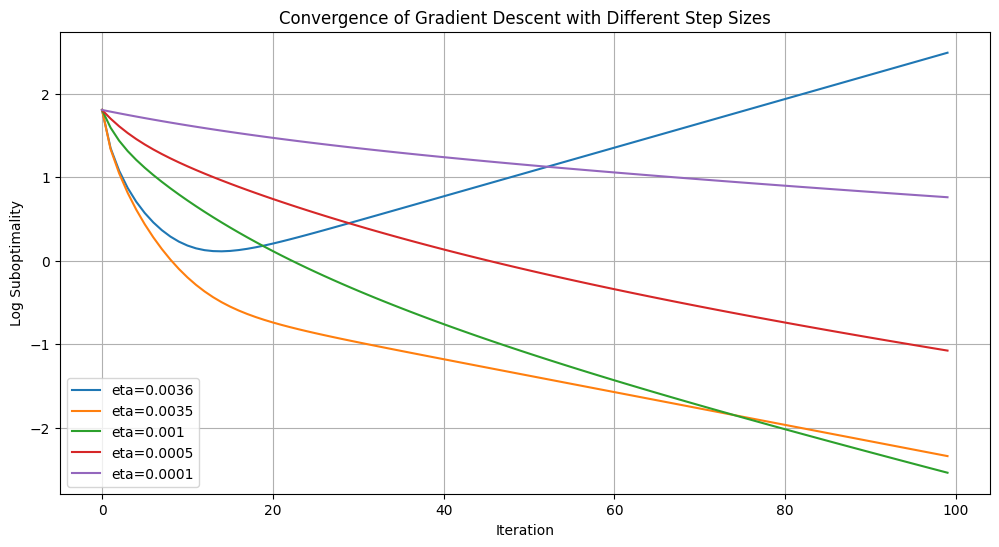

1 / maximum eigenvalue of A.T @ A: 0.0035395895131759892


In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random matrix A and vector b
np.random.seed(42)
A = np.random.randn(100, 50)
b = np.random.randn(100)

# Objective function: ||Ax - b||^2
def objective_function(x):
    return np.linalg.norm(A @ x - b) ** 2

# Gradient of the objective function
def gradient(x):
    return 2 * A.T @ (A @ x - b)

# Gradient descent function
def gradient_descent(A, b, eta, num_iterations):
    x = np.zeros(A.shape[1])  # Initialize x to zero
    obj_values = []
    f_star = objective_function(np.linalg.pinv(A) @ b)  # Best achievable value (for log suboptimality)

    for _ in range(num_iterations):
        obj_values.append(objective_function(x))
        grad = gradient(x)
        x -= eta * grad  # Update x using gradient descent

    # Compute log suboptimality
    log_suboptimality = np.log10(np.array(obj_values) - f_star + 1e-10)  # Small epsilon to avoid log(0)
    
    return log_suboptimality

# Set number of iterations
num_iterations = 100

# Define a range of step sizes to try
etas = [0.0036, 0.0035, 0.001, 0.0005, 0.0001]

# Plot the results for each step size
plt.figure(figsize=(12, 6))

for eta in etas:
    log_suboptimality = gradient_descent(A, b, eta, num_iterations)
    plt.plot(log_suboptimality, label=f'eta={eta}')

plt.xlabel('Iteration')
plt.ylabel('Log Suboptimality')
plt.title('Convergence of Gradient Descent with Different Step Sizes')
plt.legend()
plt.grid(True)
plt.show()

print('1 / maximum eigenvalue of A.T @ A:', 1 / max(np.linalg.eig(A.T @ A).eigenvalues))

There are a few observations we can make from the graph. First, note that when the step size $\eta$ is very small, then the gradient descent converges to the minimum, but at a slow rate, as indicated by the purple curve. Second, note that by gradually increasing $\eta$ (up until a point), we can achieve faster convergence, as indicated by the purple, red, and green curves. Third, however, note that after we increase $\eta$ *too* much, the convergence starts to get slower and if we increase $\eta$ enough, then gradient descent actually *diverges*, as indicted by the orange and blue curve.

As a cool and optional final note, we also printed the inverse of the minimum eigenvalue of `A.T @ A`, which is $\approx 0.003539$. Note that it is between the step sizes of $0.0036$ and $0.0035$, which represent the boundary where gradient descent starts to diverge; this is no coincidence! For those who are familiar with [Lipschitz continuity](https://en.wikipedia.org/wiki/Lipschitz_continuity), the objective function $f(\vv x) = \| A\vv x - \vv b\|^2$ has Hessian $A^\top A$, meaning that its first derivative $\nabla f(\vv x)$ is Lipschitz-continuous in $\vv x$ with with a Lipschitz constant of $L = \lambda_{\max} (A^\top A)$ (the maximum eigenvalue of $A^\top A$). It turns out that when the step size is chosen such that $\eta < \frac{1}{L}$, then gradient descent is guaranteed to converge! A proof of this fact can be found [here](https://www.stat.cmu.edu/~ryantibs/convexopt-F13/scribes/lec6.pdf).

## Zig-zags and What to do About Them

Let's consider a very simple optimization over $\vv x\in\mathbb{R}^2$ with cost function

$$
f(\vv x_1, \vv x_2) = \frac{1}{2}(x^2 + by^2)
$$

where we'll let $0<b\leq 1$ vary. The optimal solution is obviously $(x^*, y^*) = (0,0)$ but we'll use this to illustrate how gradient descent can get you into trouble sometimes.

Suppose we run gradient descent on $f$, and we further allow ourselves to pick the best possible step size $s_k$ at each iteration, i.e., we choose step size

$$
s_k = \argmin_{s > 0} f(\vv x^{(k)} - s\nabla f(\vv x^{(k)}))
$$

and then update $\vv x^{(k+1)} = \vv x^{(k)} - s_k \nabla f(\vv x^{(k)})$.

This is called _exact line search_ for selecting the step size, and is widely used in practice. If we use this choice of step size $s_k$, then it is possible to write an explicit formula for our iterates $(x^{(k)}, y^{(k)})$ as we progress down the bowl. Starting at $(x^{(0)},y^{(0)})=(b,1)$, we get
\begin{equation}
\label{line-search}
x^{(k)} = b \left(\frac{b-1}{b+1}\right)^k, \quad y^{(k)} = \left(\frac{1-b}{1+b}\right)^k, \quad f(x^{(k)},y^{(k)}) = \left(\frac{1-b}{1+b}\right)^{2k} f(x^{(0)},y^{(0)}).
\end{equation}


If $b=1$, which corresponds to a function with level sets that are perfect circles,
we succeed immediately in one step $(x^{(1)} = y^{(1)} = 0)$. This is because the gradient always points directly to the optimal point $(0,0)$:

:::{figure}../figures/14-point.jpg
:label:point
:alt:point
:width: 400px
:align: center
:::

The real purpose of this example is seen when $b$ is small. The crucial ratio in
equation [](#line-search) is
$$
r = \frac{b-1}{b+1},
$$

If $r$ is small, $(x^{(k)},y^{(k)})$ converges to $(0,0)$ very quickly. However, if $r$ is close to 1, then this convergence is very slow. For example, if $b = \frac{1}{10}$, then $r = \frac{9}{11}$; for $b = \frac{1}{100}$, $r = \frac{99}{101}$.

This means we need to take many more gradient steps to get close to $\vv x^* = (0,0)$. The [picture below](#zigzag) highlights what's going wrong: for small $b$, the level sets become elongated ellipses, so that following gradients leads to us zig-zagging our way to the origin instead of taking a straight path. It is this zig-zagging that causes slow convergence.

:::{figure}../figures/14-zigzag.jpg
:label:zigzag
:alt:zigzag
:width: 500px
:align: center
:::

So what's going wrong here? If we write $f(\vv x)$ as a quadratic form, it is:

$$
f(\vv x) = \begin{bmatrix} x & y \end{bmatrix}^T \begin{bmatrix} 1 & 0 \\ 0 & b \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} = \vv x^T K \vv x
$$

Notice that the _condition number_ of the matrix $K$ is precisely $\frac{1}{b}$, which is large for small $b$. This means that one direction (in this case the x-axis) is penalized much more than the other (the y-axis). This leads to stretched out level sets, which leads to zigzags and slow convergence. How can we fix this?

## Newton's Method (optional)

To derive the gradient descent method [(GD)](#GD), we used a first order approximation of $f(\vv x)$ near $\vv x^{(k)}$ to figure out what direction we should move in. What the last example we saw showed was that when the gradient changes quickly (look at the direction of the gradients in the zizag plot; they are all over the place!), things can go wrong. This suggests that we should also account for how quickly the gradient changes: we need to compute the "gradient of the gradient", a.k.a. the _Hessian of $f$ $\nabla^2 f(\vv x)$_. The Hessian of a function $f: \mathbb{R}^n \to \mathbb{R}$
is an $n \times n$ symmetric matrix with entries given by $2^{nd}$ order partial derivatives of $f$:

$$
\bm \nabla^2 f(\vv x)\em_{ij} = \frac{\partial^2 f}{\partial x_i \partial x_j}(\vv x)
$$

The Hessian tells us how quickly the gradient changes in the same way $f''(x)$ tells us
how quickly $f(x)$ changes for a scalar function $f(x)$. The Hessian lets us make
a _second order Taylor series approximation_ to our function $f(\vv x)$ near our current guess $\vv x^{(k)}$:

\begin{equation}
\label{second_order}
f(\vv x) \approx f(\vv x^{(k)}) + \nabla f(\vv x^{(k)})^T(\vv x- \vv x^{(k)}) + (\vv x-\vv x^{(k)})^T \nabla^2 f(\vv x^{(k)})(\vv x- \vv x^{(k)}),
\end{equation}


which provides a local _quadratic approximation_ to $f(\vv x)$ near $f(\vv x^{(k)})$:

:::{figure}../figures/14-newton.jpg
:label:newton
:alt:newton
:width: 00px
:align: center
:::

As before, if we let $\Delta \vv x^{(k)} = \vv x^{(k+1)} - \vv x^{(k)}$, we can rewrite [](#second_order) as

\begin{equation}
\label{second_order_re}
f(\vv x^{(k+1)}) - f(\vv x^{(k)}) \approx (\Delta \vv x^{(k)})^T \nabla^2 f(\vv x^{(k)}) \Delta \vv x^{(k)} +  \nabla f(\vv x^{(k)})^T \Delta \vv x^{(k)}. 
\end{equation}

Since we want to make $f(\vv x^{(k+1)}) - f(\vv x^{(k)})$ as small as possible, it makes sense to pick $\Delta \vv x^{(k)}$ to minimize the RHS of [](#second_order_re), which is another minimization problem!

We'll focus on the setting where $\nabla^2 f(\vv x^{(k)})$ is positive definite: this corresponds to settings where our function is convex. In this case, the RHS of [](#second_order_re) is a positive definite quadratic function, which is minimized at:

$$
\Delta \vv x^{(k)} = - \nabla^2 f(\vv x^{(k)})^{-1} \nabla f(\vv x^{(k)}).
$$

Using this descent direction instead of $-\nabla f(\vv x^{(k)})$ yields _Newton's Method_:

$$
\vv x^{(k+1)} = \vv x^{(k)} - \nabla^2 f(\vv x^{(k)})^{-1} \nabla f(\vv x^{(k)}).
$$

The idea behind Newton's Method is to "unstretch" the stretched out directions,
so that to our algorithm, the level sets of a function are locally circles. If
we look at our test example above, note that:

$$
\nabla^2 f(\vv x) = \begin{bmatrix} 1 & \\ & b \end{bmatrix} \Rightarrow \nabla^2 f(\vv x)^{-1} = \begin{bmatrix} 1 & \\ & \frac{1}{b} \end{bmatrix}
$$

so that for $\vv x^{(0)} = (b,1)$, we have:

\begin{align*}
\vv x^{(1)} &= \vv x^{(0)} - \nabla^2 f(\vv x)^{-1} \nabla f(\vv x) \\
&= \begin{bmatrix} b \\ 1 \end{bmatrix} - \begin{bmatrix} 1 & \\ & \frac{1}{b} \end{bmatrix} \begin{bmatrix} b \\ b \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}
\end{align*}

i.e., we converge in one step no matter what the choice of $b$ is in $f(x, y) = \frac{1}{2}(x^2+by^2)$!

The cost of this fast convergence though is that at each update, we need to solve
a linear system of equations of the form

$$
\nabla^2 f(\vv x^{(k)}) \Delta \vv x^{(k)} = \nabla f(\vv x^{(k)})
$$

which may be expensive if $\vv x$ is a high-dimensional vector. It is for this reason that gradient descent based methods are the predominant methods used in machine learning, where oftentimes the dimensionality of $\vv x\in \mathbb{R}^n$ can be on the order of millions or billions.

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/nikolaimatni/ese-2030/HEAD?labpath=/12_Ch_13_Optimization/142-Gradient_Descent.ipynb)
